In [1]:
#Import modules data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys
import h5py
from EventPreProcess import EventPreProcess

In [ ]:
#load data
data_dir = 'C:/Users/user/Desktop/Datasets/PENN_DAVIS_DATASET/indoor_flying/'
event_data = h5py.File(data_dir + 'indoor_flying1_data.hdf5')
gt_data = h5py.File(data_dir + 'indoor_flying1_gt.hdf5')

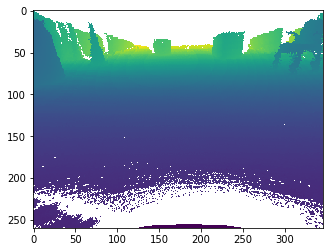

In [2]:
plt.imshow(gt_data['davis']['left']['depth_image_rect'][100])

In [3]:
print(event_data['davis']['left']['events'][1000])

[ 3.35000000e+02  2.34000000e+02  1.50464518e+09 -1.00000000e+00]


In [4]:
time_steps = np.linspace(gt_data['davis']['left']['depth_image_rect_ts'][0], gt_data['davis']['left']['depth_image_rect_ts'][-1], 100)
event_images = EventPreProcess.ConcatenateEvents(event_data['davis']['left']['events'], time_steps)

Percentage finished: 0.0
Percentage finished: 0.16
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.5582
Percentage finished: 0.55

In [8]:
time_steps = np.linspace(gt_data['davis']['left']['depth_image_rect_ts'][0], gt_data['davis']['left']['depth_image_rect_ts'][-1], 100)
event_binned_images = EventPreProcess.EventBinning(event_data['davis']['left']['events'], time_steps)

start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start


In [5]:
frame_images = EventPreProcess.SelectFrames(event_data['davis']['left']['image_raw'], event_data['davis']['left']['image_raw_ts'], time_steps)

depth_images = EventPreProcess.SelectFrames(gt_data['davis']['left']['depth_image_rect'], gt_data['davis']['left']['depth_image_rect_ts'], time_steps)

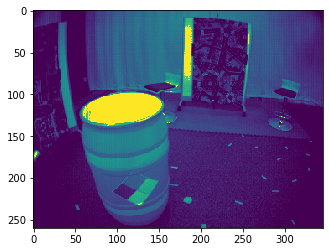

In [6]:
plt.imshow(frame_images[70])

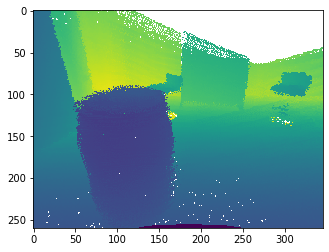

In [7]:
plt.imshow(depth_images[70])

In [8]:
plt.imshow(event_binned_images[70][:,:,0])

NameError: name 'event_binned_images' is not defined

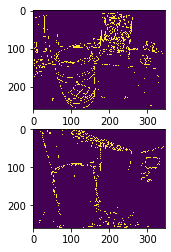

In [9]:
#Edge detection
frame_edges = EventPreProcess.EdgeDetection(frame_images)
depth_edges = EventPreProcess.EdgeDetection(depth_images, convert=True)

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.imshow(np.array(frame_edges[70]).reshape(260, 346))
ax.autoscale(False)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax, sharey=ax)
ax2.imshow(np.array(depth_edges[70]).reshape(260, 346))
ax2.autoscale(False)
plt.show()

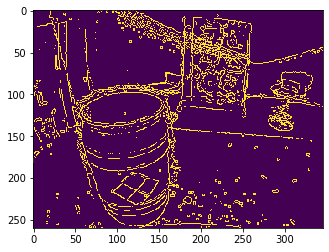

In [10]:
edge_images = EventPreProcess.BinaryAddImages(frame_edges, depth_edges)

plt.imshow(edge_images[70])

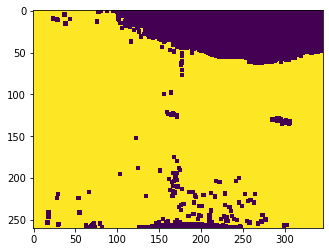

In [11]:
eroded_depth_images = EventPreProcess.ErodeImages(depth_images, binary_format=True)

plt.imshow(eroded_depth_images[70])

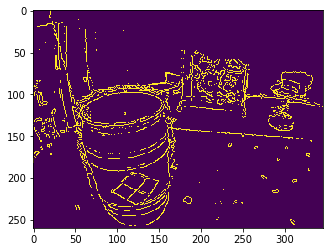

In [12]:
filtered_edge_images = EventPreProcess.MultiplyImages(edge_images, eroded_depth_images)

plt.imshow(filtered_edge_images[70])

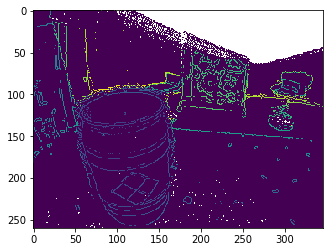

In [13]:
depth_edge_images = EventPreProcess.MultiplyImages(depth_images, filtered_edge_images)

plt.imshow(depth_edge_images[70])

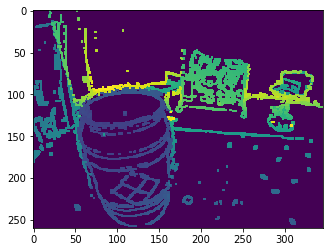

In [14]:
diluted_depth_edge_images =EventPreProcess.DiluteImages(depth_edge_images,kernel_size=3,  binary_format=False)

plt.imshow(diluted_depth_edge_images[70])

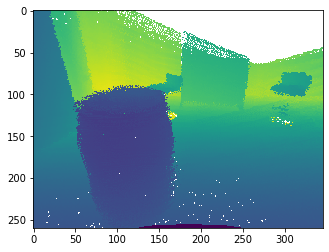

In [15]:
plt.imshow(depth_images[70])

In [16]:
#Mask depth image based on event profile
event_mask = EventPreProcess.EdgeDetection(event_binned_images[:,:,:,0], convert=True)

diluted_event_mask = EventPreProcess.DiluteImages(event_mask,kernel_size=3,  binary_format=True)

event_masked_depth_image = EventPreProcess.MultiplyImages(depth_images, diluted_event_mask)
event_masked_depth_image = EventPreProcess.DiluteImages(event_masked_depth_image,kernel_size=1,  binary_format=False)

plt.imshow(event_masked_depth_image[30])

NameError: name 'event_binned_images' is not defined

In [46]:
#write data
hf = h5py.File('indoor_flying_preprocessed.hdf5', 'w')
hf.create_dataset('event_images', data=event_images)
hf.create_dataset('event_binned_images', data=event_binned_images)
hf.create_dataset('event_mask_images', data=event_mask)
hf.create_dataset('diluted_event_mask_images', data=diluted_event_mask)
hf.create_dataset('event_masked_depth_images', data=event_masked_depth_image)
hf.create_dataset('depth_images_timed', data=depth_images)
hf.create_dataset('frame_images_timed', data=frame_images)
hf.create_dataset('edge_images', data=edge_images)
hf.create_dataset('eroded_depth_images', data=eroded_depth_images)
hf.create_dataset('depth_edge_images', data=depth_edge_images)
hf.create_dataset('diluted_depth_edge_images', data=diluted_depth_edge_images)
hf.create_dataset('time_steps', data=time_steps)
hf.close()


In [4]:
#load hf file
hfl = h5py.File('indoor_flying_preprocessed.hdf5', 'r')
event_images = hfl['event_images']
event_binned_images = hfl['event_binned_images'] 
event_mask = hfl['event_mask_images'] 
diluted_event_mask = hfl['diluted_event_mask_images'] 
event_masked_depth_image = hfl['event_masked_depth_images'] 
depth_images = hfl['depth_images_timed']
frame_images = hfl['frame_images_timed']
edge_images = hfl['edge_images']
eroded_depth_images = hfl['eroded_depth_images']
depth_edge_images = hfl['depth_edge_images']
diluted_depth_edge_images = hfl['diluted_depth_edge_images']
time_steps = hfl['time_steps']